In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dense, Dropout, Flatten
from tensorflow.keras.initializers import he_normal
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
csv_path='F:/Deep Learning/Data/Blood cell dataset/dataset2-master/dataset2-master'
test_images='F:/Deep Learning/Data/Blood cell dataset/dataset2-master/dataset2-master/images/TRAIN'
train_images='F:/Deep Learning/Data/Blood cell dataset/dataset2-master/dataset2-master/images/TEST'
val_images='F:/Deep Learning/Data/Blood cell dataset/dataset2-master/dataset2-master/images/TEST_SIMPLE'

In [3]:
datagen = ImageDataGenerator(rescale=1./225.)
train_generator = datagen.flow_from_directory(
                                        directory = train_images,
                                        batch_size =64,
                                        seed = 42,
                                        shuffle = True,
                                        class_mode = "categorical",
                                        target_size = (120,120),
                                        color_mode = 'rgb')

valid_generator = datagen.flow_from_directory(
                                        directory = val_images,
                                        batch_size =64,
                                        seed = 42,
                                        shuffle = True,
                                        class_mode = "categorical",
                                        target_size = (120,120),
                                        color_mode = 'rgb')

test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
                                        directory = test_images,
                                        batch_size =64,
                                        seed = 42,
                                        shuffle = True,
                                        class_mode = "categorical",
                                        target_size = (120,120),
                                        color_mode = 'rgb')

Found 9957 images belonging to 4 classes.
Found 71 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [4]:
train_generator.image_shape

(120, 120, 3)

In [5]:
train_generator.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

# Model Architecture

In [6]:
dropout=0.5


model = Sequential()
model.add(Conv2D(input_shape=(120,120,3),filters=64,kernel_size=(3,3),padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same",kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))



model.add(Flatten())
model.add(Dense(4096,kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout)) 
model.add(Dense(4096,kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout)) 

model.add(Dense(4, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 120, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 120, 120, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 64)        0

In [8]:
#change_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [53]:
model.compile(
              loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])


In [54]:
model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50,
    callbacks=early_stop
)

Epoch 1/50
156/156 [==============================] - 1352s 9s/step - loss: 1.4097 - accuracy: 0.4598 - val_loss: 5.6521 - val_accuracy: 0.0845
Epoch 2/50
156/156 [==============================] - 1313s 8s/step - loss: 0.4090 - accuracy: 0.8280 - val_loss: 1.5031 - val_accuracy: 0.6620
Epoch 3/50
156/156 [==============================] - 1539s 10s/step - loss: 0.1536 - accuracy: 0.9398 - val_loss: 0.8084 - val_accuracy: 0.8169
Epoch 4/50
156/156 [==============================] - 1590s 10s/step - loss: 0.0694 - accuracy: 0.9748 - val_loss: 0.6295 - val_accuracy: 0.8451
Epoch 5/50
156/156 [==============================] - 1474s 9s/step - loss: 0.0679 - accuracy: 0.9753 - val_loss: 1.5978 - val_accuracy: 0.7606
Epoch 6/50
156/156 [==============================] - 1406s 9s/step - loss: 0.0478 - accuracy: 0.9826 - val_loss: 0.7685 - val_accuracy: 0.8169
Epoch 7/50
156/156 [==============================] - 1575s 10s/step - loss: 0.0228 - accuracy: 0.9921 - val_loss: 0.9568 - val_accura

KeyboardInterrupt: 

In [55]:
#model.save_weights('VGG16_blood_cell_weights.h5py', save_format = 'h5')

In [56]:
model.save('complete_saved_model/VGG16_blood_cell/')

INFO:tensorflow:Assets written to: complete_saved_model/VGG16_blood_cell/assets


In [46]:
model1 = tf.keras.models.load_model('complete_saved_model/VGG16_blood_cell/')

In [96]:
early= tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01 ,patience=2, verbose=1, mode='auto')

In [1]:
checkpoint_filepath= 'C:/Users/NIKHIL/complete_saved_model'

In [2]:
checkpoint_filepath

'C:/Users/NIKHIL/complete_saved_model'

In [99]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True),

In [100]:
 model1.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early,checkpoint ]
)

Epoch 1/20
156/156 [==============================] - 1753s 11s/step - loss: 0.1147 - accuracy: 0.9610 - val_loss: 1.6586 - val_accuracy: 0.7042
INFO:tensorflow:Assets written to: C:/Users/akshay0909\complete_saved_model\assets
Epoch 2/20
156/156 [==============================] - 1593s 10s/step - loss: 0.0701 - accuracy: 0.9769 - val_loss: 2.7312 - val_accuracy: 0.7606
INFO:tensorflow:Assets written to: C:/Users/akshay0909\complete_saved_model\assets
Epoch 3/20
156/156 [==============================] - 1569s 10s/step - loss: 0.0596 - accuracy: 0.9787 - val_loss: 1.2402 - val_accuracy: 0.8592
INFO:tensorflow:Assets written to: C:/Users/akshay0909\complete_saved_model\assets
Epoch 4/20
156/156 [==============================] - 1568s 10s/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 1.5042 - val_accuracy: 0.8732
INFO:tensorflow:Assets written to: C:/Users/akshay0909\complete_saved_model\assets
Epoch 5/20
156/156 [==============================] - 1852s 12s/step - loss: 0.0239 - ac

In [106]:
 model1.evaluate(
    test_generator,
)

39/39 [==============================] - 70s 2s/step - loss: 1.6734 - accuracy: 0.7616


[1.6734230518341064, 0.7615601420402527]

In [109]:
model1.save('aks_vgg_saved_model/VGG16_blood_cell.1/')

INFO:tensorflow:Assets written to: aks_vgg_saved_model/VGG16_blood_cell.1/assets


In [9]:
model2= tf.keras.models.load_model('aks_vgg_saved_model/VGG16_blood_cell.1/')

In [10]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 120, 120, 64)      1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 120, 120, 64)      256       
_________________________________________________________________
activation_15 (Activation)   (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 120, 120, 64)      36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 120, 120, 64)      256       
_________________________________________________________________
activation_16 (Activation)   (None, 120, 120, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 60, 64)       

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

img shape: (1, 120, 120, 3)
[[0. 1. 0. 0.]]


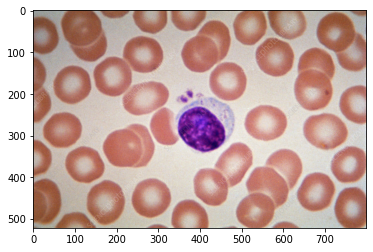

In [57]:
from matplotlib.pyplot import imread 
img_path='Downloads/lymphocyte_LM_.jpg'
img = image.load_img(img_path, target_size=(120,120))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
print('img shape:',x.shape)
my_image=imread(img_path)
plt.imshow(my_image)
print(model1.predict(x))

In [29]:
train_generator.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [209]:
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']